# Compare points found by relative baselines to absolute points

Check the accuracy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from numpy import linalg as LA
from functools import reduce
import os
import sys
import time
import datetime 
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point
import shapely
import fiona

In [2]:
#import points from relative baselines
ldf = ['arc1', 'arc2', 'arc4', 'arc5', 'arc6']
rdfs = {} #relative GNSS dataframes

for df in ldf:
    rdfs[df] =  gpd.read_file(f"/Volumes/arc_04/whitefar/DATA/TASMAN/GNSS_relative/DATAFRAME/{df}_abs_from_rel_arc1.shp")

In [3]:
#import points from absolute GNSS

site_units = [['tal1', 'arc2'], ['tal2', 'arc1'], ['tac2', 'arc5'], ['tac3', 'arc4'], ['tar2', 'arc6']] #these are the ones with data

adfs = {}  #dataframes

for site, unit in site_units:
    adfs[unit] = gpd.read_file(f"/Volumes/arc_04/whitefar/DATA/TASMAN/GNSS_ABSOLUTE/GNSS_dataframe/{site+unit}_moreattributes.shp")

In [4]:
#get distance between the points

rel_v_abs = {}
for site in ldf:
    rel_v_abs[site]  =  pd.Series([Point.distance(adfs[site].geometry[i]) for i,Point in enumerate(rdfs[site].geometry)])

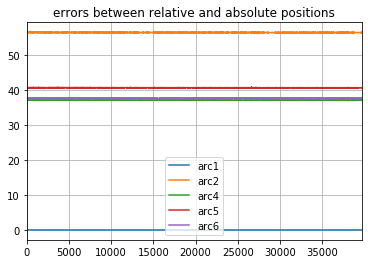

In [5]:
for site in ldf:
    rel_v_abs[site].plot()
plt.title("errors between relative and absolute positions")
plt.grid()
plt.legend(ldf)

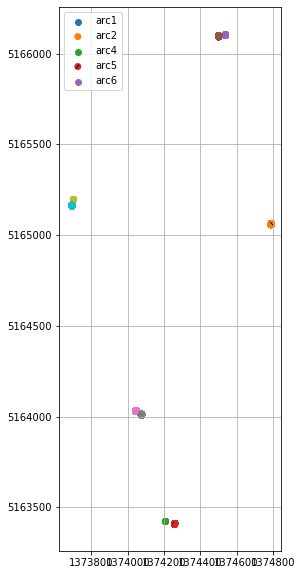

In [6]:
fig, ax = plt.subplots(1,1,figsize=[10,10])
for site in ldf:
    rdfs[site].plot(ax=ax)
    adfs[site].plot(ax=ax,hatch='x')
plt.grid()
plt.legend(ldf)